<a href="https://colab.research.google.com/github/u201820177/-Coursera_Capstone/blob/main/PROYECTOFINAL_semana5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PLANTEAMIENTO DEL PROBLEMA**

# **Problema**

El problema que trataremos es :¿Cuales son los mejores distritos para vivir en Toronto  ?

# **Objetivo**

Ciertos usuarios desean vivir en Toronto y buscan los mejores distritos con cierto criterios : 


*   Precio del departamento
*   Seguridad de la zona


*   Si se encuentra cercano en zonas comerciales
*   Si hay colegios, hospitales cercanos

# **Metodologia**


1.   Con los datos de Foursquare de Toronto se hallaran los distritos que hay en cada zona marcada por el código postal.

2.   Se podran observar todos los distritos y buscar departamentos y colocarlos en un tabla, con las caracteristicas que contiene.
3.   Se encerraran todos los departamentos por distritos.
4.   Se seleccionara los departamentos que cumplan con la mayoria de los criterios .


# Datos

Todos datos que se usaremos son aquellos brindados por Foursquare, por todo el repositorio de locales con su ubicación que permiten determinar la conveniencia geográfica de la puesta en marcha de buscar departamentos de una determinada zona.

# **Nootebok Jupyter para el Proyecto Capstone**

In [1]:
import pandas as pd
import numpy as np
print ("¡Hola, Proyecto Final del Curso!")

¡Hola, Proyecto Final del Curso!


In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import requests
!pip install geocoder
import geocoder 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 98 kB 3.3 MB/s 


In [3]:
linkpost= "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"


In [4]:
page = requests.get(linkpost)
soup = BeautifulSoup(page.content, 'html.parser')

table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# Imprimir (table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [5]:
df.head(11)

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [6]:
geo_url = "https://cocl.us/Geospatial_data"
geo_df = pd.read_csv(geo_url)
geo_df.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
geo_df.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [7]:
df = pd.merge(df, geo_df, on='PostalCode')
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [8]:
df.groupby('Borough').count()['Neighborhood']

Borough
Central Toronto            9
Downtown Toronto          17
Downtown Toronto Stn A     1
East Toronto               4
East Toronto Business      1
East York                  4
East York/East Toronto     1
Etobicoke                 11
Etobicoke Northwest        1
Mississauga                1
North York                24
Queen's Park               1
Scarborough               17
West Toronto               6
York                       5
Name: Neighborhood, dtype: int64

In [9]:
df_toronto = df
df_toronto.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [10]:
boroughs = df_toronto['Borough'].unique().tolist()

In [11]:
lat_toronto = df_toronto['Latitude'].mean()
lon_toronto = df_toronto['Longitude'].mean()
print('Las coordenadas geográficas de Toronto son {}, {}'.format(lat_toronto, lon_toronto))

Las coordenadas geográficas de Toronto son 43.704607733980595, -79.39715291165048


In [12]:
borough_color = {}
for borough in boroughs:
    borough_color[borough]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3))

In [13]:
import folium

In [14]:
map_toronto = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=10.5)

for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], 
                                           df_toronto['Longitude'],
                                           df_toronto['Borough'], 
                                           df_toronto['Neighborhood']):
    label_text = borough + ' - ' + neighborhood
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=borough_color[borough],
        fill_color=borough_color[borough],
        fill_opacity=0.8).add_to(map_toronto)  
    
map_toronto

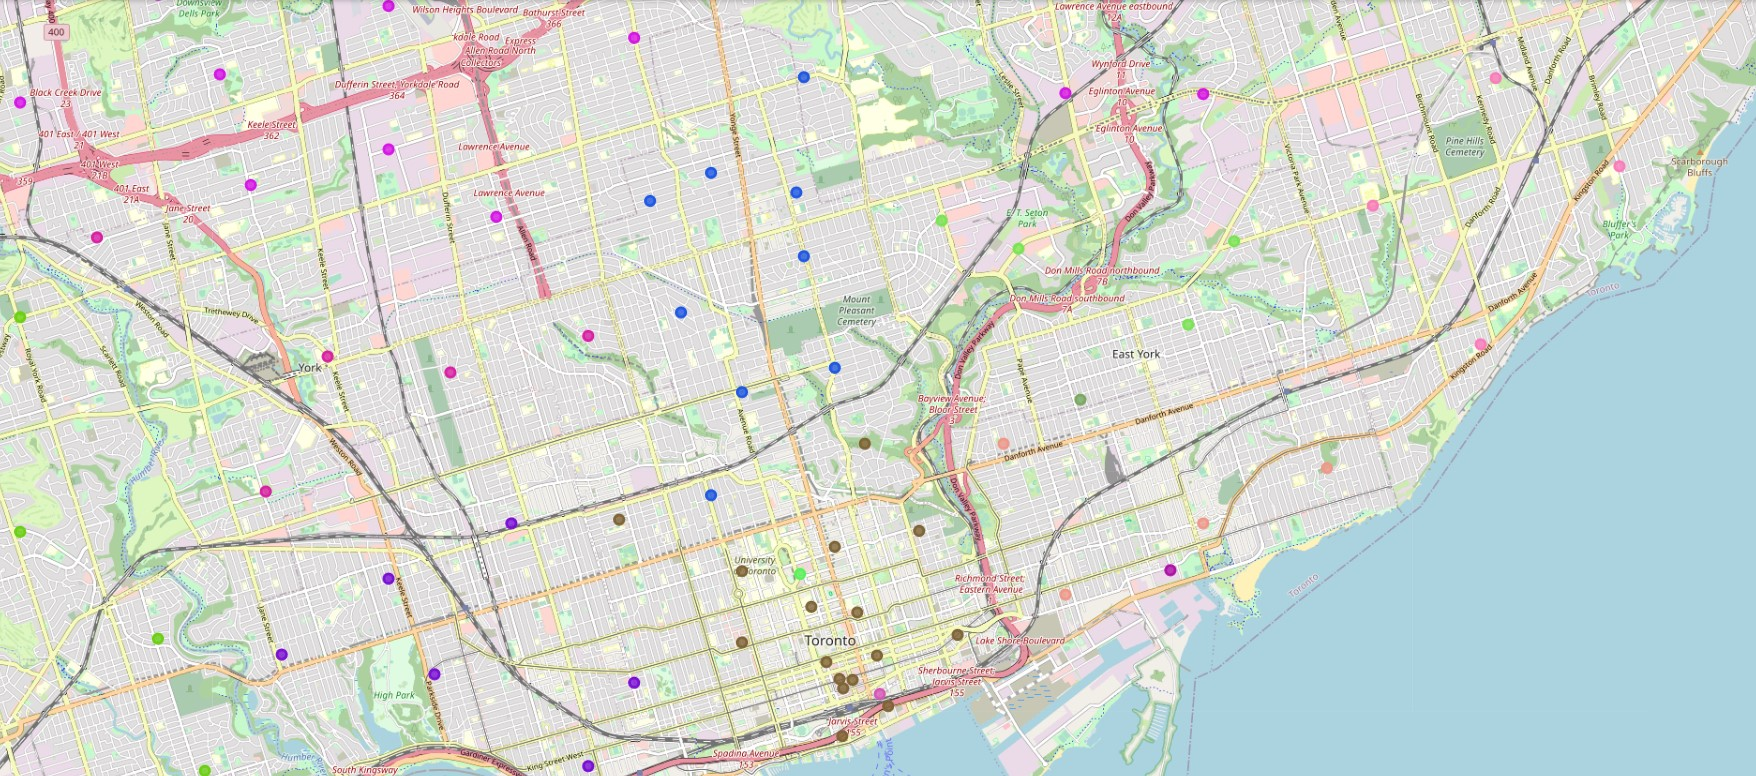